## Monitoria: Programação Estruturada
**15-05-2024**

# Uma Introdução a Biblioteca Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Dados normalmente se encontram em arquivos .csv, onde a estrutura de uma tabela é construída com separadores (normalmente, "," ou ";"). Para ler um .csv com pandas, basta utilizar o função:

```python
pd.read_csv("nomedoarquivo.csv")
```

Ela retorna um **DataFrame**, estrutura básica do pandas na qual se é possível trabalhar com os dados e manipulá-los de diferentes maneiras. Outra estrutura importante do pandas se chama **Series**, que representa apenas uma única coluna de dados, sendo o DataFrame um conjunto de Series. Para visualizar o Dataframe, basta chamar a variável onde este foi salvo. Seguem algumas funções básicas:

```python
dt.head(n = 8) # visualiza as n primeiras linhas da tabela
dt.tail(n = 8) # visualiza as n últimas linhas da tabela
dt.shape # retorna uma tupla com (qnt_linhas, qnt_colunas)
dt['coluna'] # retorna uma Serie correspondente a coluna selecionada
```

A depender do arquivo csv lido, pode ser necessário considerar outros parâmetros da função read_csv, como o sep, que informa o separador usado no arquivo. Com esse link, é possível encontrar todos os parâmetros com suas descrições: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html


In [9]:
?pd.read_csv

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols: 'UsecolsArgType' = None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters: 'Mapping[Hashable, Callable] | None' = None,
    true_values: 'list | None' = None,
    false_values: 'list | None' = None,
    skipinitialspace: 'bool' = False,
    skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None,
    keep_default_na: 'bool' = True,
    na_filter: '

In [2]:
data = pd.read_csv("disasters.csv")

# retorna os primeiros elementos do DataFrame
data.head(n=10)

,Entity,Year,Disasters
0,All disasters,1900,6
1,All disasters excluding earthquakes,1900,5
2,All disasters excluding extreme temperature,1900,6
3,Drought,1900,2
4,Earthquake,1900,1
5,Extreme weather,1900,1
6,Flood,1900,1
7,Volcanic activity,1900,1
8,All disasters,1901,1
9,All disasters excluding extreme temperature,1901,1


In [37]:
# Todos os tipos de desastres
categorias = data["Entity"].unique()

categorias

array(['All disasters', 'All disasters excluding earthquakes',
       'All disasters excluding extreme temperature', 'Drought',
       'Earthquake', 'Extreme weather', 'Flood', 'Volcanic activity',
       'Dry mass movement', 'Wet mass movement', 'Wildfire',
       'Extreme temperature', 'Fog', 'Glacial lake outburst flood'],
      dtype=object)

In [14]:
data["Year"].unique()

array([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023, 2024])

### Propriedade `.loc`

A propriedade *.loc* dos DataFrames pandas é uma das mais básicas e fundamentais na manipulação dos dados. Ela permite acessar subconjuntos de linhas e colunas com base em indices (valores, intervalos ou mapeamentos) ou condições, retornando um novo DataFrame ou Serie.

```python

dt.loc[indice] # linha única
dt.loc[[indice1, indice2, indice3]] # conjunto de linhas
dt.loc[indice1:indiceN] # intervalo de linhas

dt.loc[indice, 'nome_col'] # linha única e coluna única
dt.loc[indice1:indiceN, 'nome_col1':'nome_colN'] # intervalo de linhas e de colunas
dt.loc[:, ['nome_col1', 'nome_col2', 'nome_col3']] # todas as linhas de um conjunto de colunas

dt.loc[dt['nome_col'] > valor] # Selecionando por condições, > < == != >= <=
dt.loc[(condicao1) & (condicao2)] # Utilizando operadores logicos (& and, | or, ~ neg)
```

Há também a possibilidade de selecionar através de algum mapeamento, normalmente feito por outra função do pandas, de modo que se tenha uma Serie informando quais linhas serão selecionadas (True) e quais não serão (False)


In [16]:
data.loc[data["Disasters"] < 3]

,Entity,Year,Disasters
3,Drought,1900,2
4,Earthquake,1900,1
5,Extreme weather,1900,1
6,Flood,1900,1
7,Volcanic activity,1900,1
...,...,...,...
1105,Glacial lake outburst flood,2021,2
1117,Glacial lake outburst flood,2022,1
1129,Glacial lake outburst flood,2023,1
1138,Extreme temperature,2024,2


In [4]:
terremotos_2000_2024 = data.loc[(data["Year"] >= 2000) & (data["Year"] <= 2024) & (data["Entity"] == "Earthquake")]

terremotos_2000_2024.head()

,Entity,Year,Disasters
860,Earthquake,2000,30
871,Earthquake,2001,25
883,Earthquake,2002,37
894,Earthquake,2003,40
906,Earthquake,2004,42


In [5]:
media_terremotos_00_24 = np.mean(terremotos_2000_2024["Disasters"])

print(f"A media de terremotos entre 2000 e 2024 é de {media_terremotos_00_24}")

A media de terremotos entre 2000 e 2024 é de 26.56


Text(0, 0.5, 'Quantidade de terremotos\n')

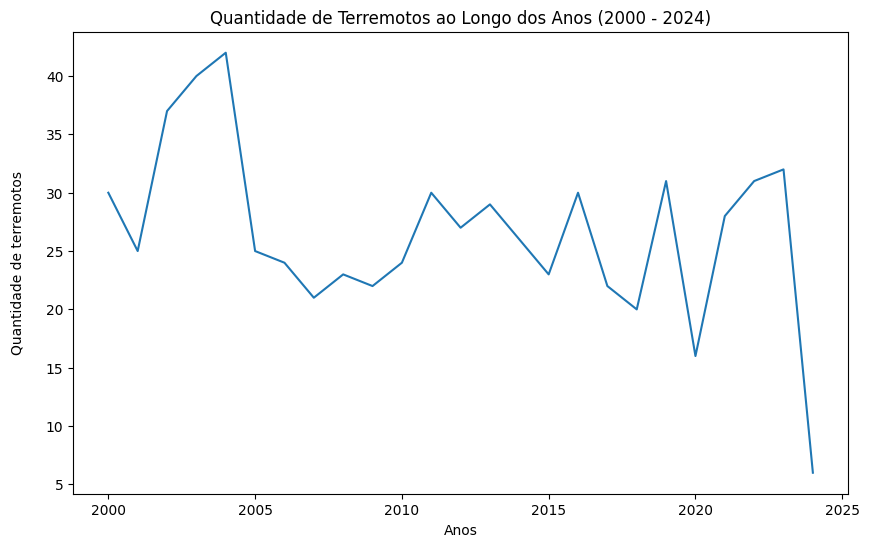

In [35]:
plt.figure(figsize = (10,6))
plt.title("Quantidade de Terremotos ao Longo dos Anos (2000 - 2024)")
plt.plot(terremotos_2000_2024["Year"], terremotos_2000_2024["Disasters"])
plt.xlabel("Anos")
plt.ylabel("Quantidade de terremotos\n")

In [38]:
?plt.bar

Signature:
plt.bar(
    x: 'float | ArrayLike',
    height: 'float | ArrayLike',
    width: 'float | ArrayLike' = 0.8,
    bottom: 'float | ArrayLike | None' = None,
    *,
    align: "Literal['center', 'edge']" = 'center',
    data=None,
    **kwargs,
) -> 'BarContainer'
Docstring:
Make a bar plot.

The bars are positioned at *x* with the given *align*\ment. Their
dimensions are given by *height* and *width*. The vertical baseline
is *bottom* (default 0).

Many parameters can take either a single value applying to all bars
or a sequence of values, one for each bar.

Parameters
----------
x : float or array-like
    The x coordinates of the bars. See also *align* for the
    alignment of the bars to the coordinates.

height : float or array-like
    The height(s) of the bars.

    Note that if *bottom* has units (e.g. datetime), *height* should be in
    units that are a difference from the value of *bottom* (e.g. timedelta).

width : float or array-like, default: 0.8
    The width(s) 

In [7]:
# Função que gera grafico de barras sobre categorias de desastres em um ano específico

def gera_barplot_desastres_por_ano(dados: pd.DataFrame, ano: int) -> None:
    dados_por_ano = dados.loc[dados["Year"] == ano]

    plt.figure(figsize=(10,6))
    plt.bar(x = dados_por_ano["Entity"], height=dados_por_ano["Disasters"])
    plt.title(f"Desastres no ano de {ano}")
    plt.xlabel("Tipos de desastres")
    plt.ylabel("Quantidade")
    plt.xticks(rotation = "vertical")
    plt.show()

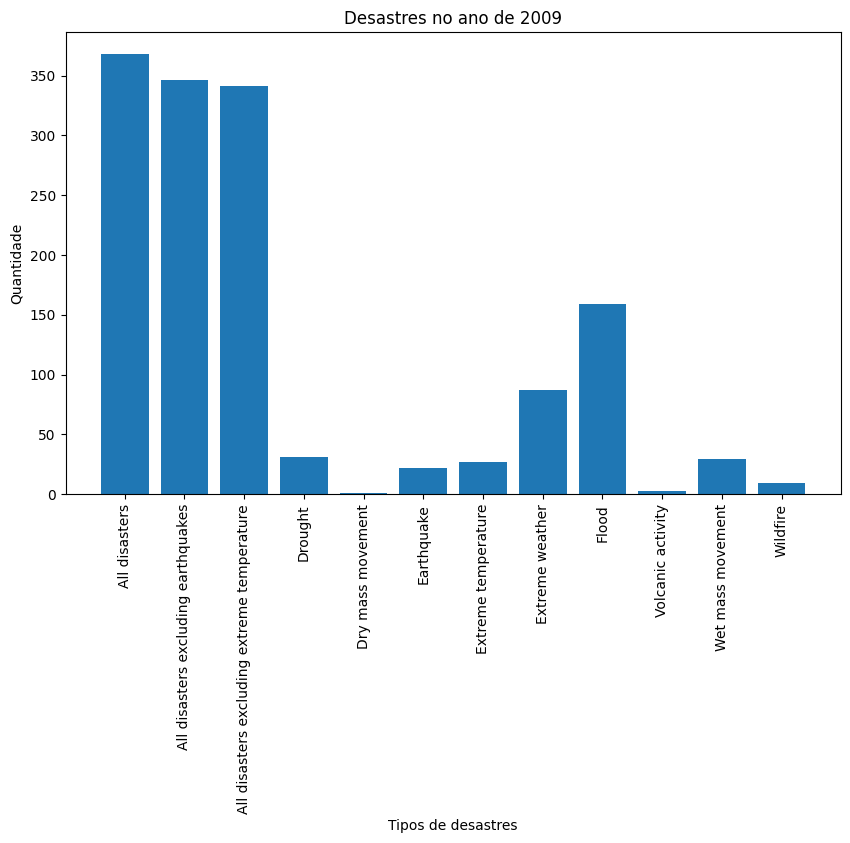

In [9]:
gera_barplot_desastres_por_ano(data, 2009)

In [97]:
def gera_barplot_desastres_por_anos(dados: pd.DataFrame, ano_inicial: int, ano_final: int) -> None:

    intervalo = abs(ano_final - ano_inicial)
    plt.figure(figsize=(12,8))
    fig, axs = plt.subplots(intervalo // 2, 2)
    contador_anos = ano_inicial
    fig.set_figheight(8)
    fig.set_figwidth(12)
    for i in range(intervalo // 2):
        for ax in axs[i]:
            dados_ano = dados.loc[dados["Year"] == contador_anos]
            ax.bar(x = dados_ano["Entity"], height = dados_ano["Disasters"])
            ax.set_xlabel("Tipos de desastres")
            ax.set_title(f"Ano: {contador_anos}")
            ax.set_ylabel("Quantidade")
            ax.tick_params(labelrotation=90)
            #ax.set_xticks(rotation = "vertical")
            contador_anos += 1

    plt.show()

<Figure size 1200x800 with 0 Axes>

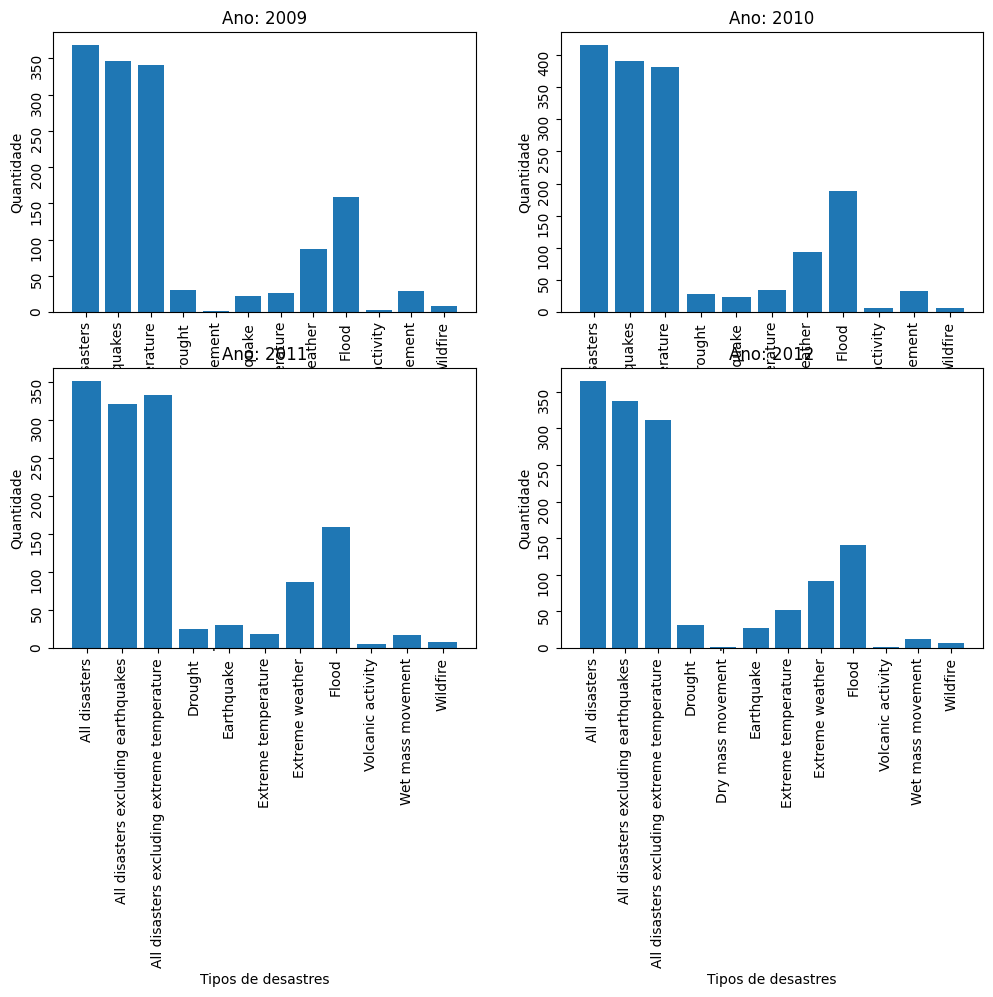

In [98]:
gera_barplot_desastres_por_anos(data, 2009, 2013)

### Agrupando dados com `groupby`

```python
dt.groupby(by = 'coluna', as_index = False)
```

Normalmente é associada a uma função de agregação, que realiza operações sobre os dados agrupados, retornando um novo DataFrame. Podem ser:

1. _Funções de agregação estatística:_
   - `mean()`: Calcula a média dos valores numéricos.
   - `sum()`: Calcula a soma dos valores numéricos.
   - `min()`: Encontra o valor mínimo.
   - `max()`: Encontra o valor máximo.
   - `count()`: Conta o número de ocorrências.
   - `size()`: Retorna o tamanho do grupo (incluindo NaN).
   - `std()`: Calcula o desvio padrão.
   - `var()`: Calcula a variância.
   - `median()`: Calcula a mediana.
   - `quantile(q)`: Calcula o quantil específico (por exemplo, `quantile(0.25)` para o quartil 1).

2. _Funções de agregação personalizadas:_
   - `agg(func)`: Aplica uma função personalizada ao grupo.
   - `apply(func)`: Aplica uma função personalizada ao grupo.


In [16]:
# Dados sobre Airbnb's de Nova York

nyc_dt = pd.read_csv("ab_nyc.csv")

nyc_dt.head()

,id,name,host_id,host_name,district,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Considere os novos dados referentes a Airbnbs em Nova York. A partir desses dados, podemos inferir algumas perguntas:

- [x] Qual a quantidade de Airbnbs em cada distrito?
- [x] Nos distritos, qual o valor mínimo permitido de noites é mais comumente encontrado?
- [ ] Qual o preço médio em Nova Iorque para os diferentes tipos de quarto?
- [ ] Qual o tráfego de pessoas nos Airbnbs em cada distrito?
- [ ] Quais são os menores preços de Airbnbs nos bairros do distrito Manhattan?
- [ ] Quais os Airbnbs com mais avaliações no distrito Queens?

In [17]:
# Tipos de quartos:
print(nyc_dt['room_type'].unique())

['Private room' 'Entire home/apt' 'Shared room']


In [18]:
# Distritos de Nova York
print(nyc_dt["district"].unique())

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


**1. Qual a quantidade de Airbnbs em cada distrito?**

Para respondermos essa pergunta, podemos utilizar uma função que calcula a ocorrência das categorias na base de dados:

```python
dt['coluna'].value_counts()
```

Com os dados, é possível ver que quantidade de Airbnbs segue a demanda populacional dos distritos, sendo Manhattan o mais populoso e Staten Island o menos populoso.

https://pt.wikipedia.org/wiki/Nova_Iorque


In [19]:
nyc_dt['district'].value_counts()

district
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

**2. Nos distritos, qual o valor mínimo permitido de noites é mais comumente encontrado?**

Podemos, inicialmente, criar uma subtabela apenas com as colunas `district` e `minimum_nights`, agrupar os dados por distritos com `groupby` e em seguida aplicar uma função de moda para verificar os valores mais comuns. Não existe uma função imediata para isso, então teremos que usar o **.agg()**, passando a função `mode` pertencente a estrutura `Series` do pandas

In [20]:
# Pegando subtabela com colunas "district" e "minimum_nights"
distrito_noites = nyc_dt.loc[:, ['district', 'minimum_nights']]

# Agrupando e agregando pela moda
distrito_noites.groupby(by = 'district', as_index = False).agg(pd.Series.mode)

,district,minimum_nights
0,Bronx,1
1,Brooklyn,2
2,Manhattan,1
3,Queens,1
4,Staten Island,2


## Sua vez

Tente responder as demais dúvidas e criar novas. Sinta-se a vontade para criar gráficos que possibilitem uma melhor visualização dos resultados 

In [ ]:
# Qual o preço médio em Nova Iorque para os diferentes tipos de quarto?

In [ ]:
# Qual o tráfego de pessoas nos Airbnbs em cada distrito?

In [ ]:
# Quais são os menores preços de Airbnbs nos bairros do distrito Manhattan?

In [ ]:
# Quais os Airbnbs com mais avaliações no distrito Queens?